## Experiment 1: Simple pendulum with a mass at the end

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit, describe

#### Theory
We want to determine the gravitational acceleration: $g = L\left( \frac{2\pi}{T} \right) ^{2}$. Here we have uncertanties on both $L$ and $T$, so our law of error probagation becomes us: $\sigma_{g} = \sqrt{ \left( \frac{\partial g}{\partial L} \right) ^{2}\sigma_{L}^{2} + \left( \frac{\partial g}{\partial T} \right) ^{2}\sigma_{T}^{2}} = \sqrt{ \left( \frac{2 \pi}{T} \right) ^{2} \sigma_{L}^{2} + \left( -\frac{8\pi^{2} L}{T^{3}} \right) ^{2} \sigma_{T}^{2} }$

In [14]:
# Importing data
data_1 = np.genfromtxt('Simulated data - pendulum1.txt', skip_header = 0)
data_2 = np.genfromtxt('Simulated data - pendulum2.txt', skip_header = 0)

N_1 = data_1[:,0]
t_1 = data_1[:,1]

N_2 = data_2[:,0]
t_2 = data_2[:,1]

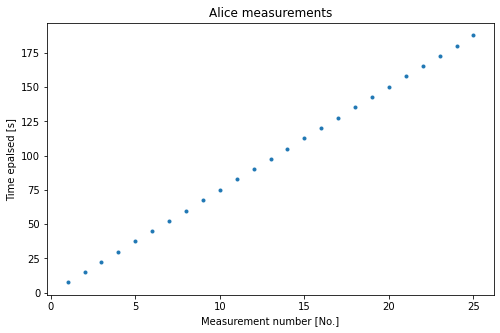

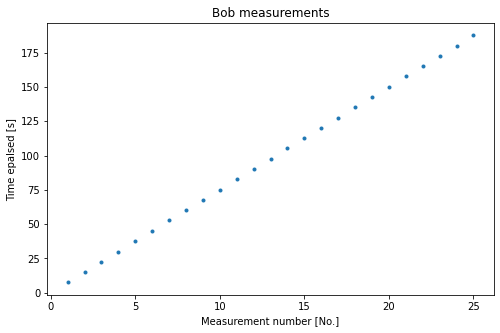

In [22]:
# Plotting the data
fig1 = plt.figure(figsize = (8,5))
plt.plot(N_1, t_1, '.')
plt.xlabel('Measurement number [No.]')
plt.ylabel('Time epalsed [s]')
plt.title('Alice measurements')

fig2 = plt.figure(figsize = (8,5))
plt.plot(N_2, t_2, '.')
plt.xlabel('Measurement number [No.]')
plt.ylabel('Time epalsed [s]')
plt.title('Bob measurements');

In [95]:
# Defnining the linear formula to use for fitting
def linear_1(a, b):
    y = a * N_1 + b
    return y

def linear_2(a, b):
    y = a * N_2 + b
    return y

In [100]:
# Fitting
m_1 = Minuit(linear_1, a = 7.46, b = 0)
m_2 = Minuit(linear_2, a = 7.46, b = 0)

In [101]:
a_fit1 = m_1.values["a"]  
b_fit1 = m_1.values["b"]

a_fit2 = m_2.values["a"]  
b_fit2 = m_2.values["b"]

print(a_fit2, '[s]')
print(b_fit)

7.46 [s]
0.0


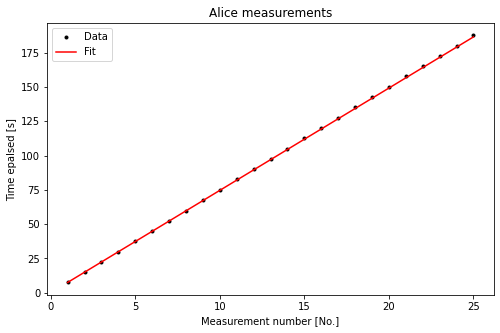

In [102]:
fig1 = plt.figure(figsize = (8,5))
plt.plot(N_1, t_1, '.', label = 'Data', color = 'black')
plt.plot(N_1, linear_1(a_fit1, b_fit1), '-', label = 'Fit', color = 'red')
plt.xlabel('Measurement number [No.]')
plt.ylabel('Time epalsed [s]')
plt.title('Alice measurements')
plt.legend();

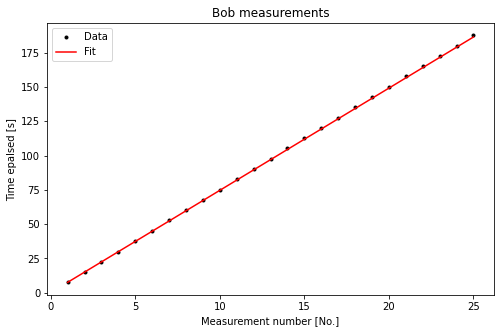

In [104]:
fig2 = plt.figure(figsize = (8,5))
plt.plot(N_2, t_2, '.', label = 'Data', color = 'black')
plt.plot(N_2, linear_2(a_fit2, b_fit2), '-', label = 'Fit', color = 'red')
plt.xlabel('Measurement number [No.]')
plt.ylabel('Time epalsed [s]')
plt.title('Bob measurements')
plt.legend();

In [ ]:
# Making distribution of time residuals
